<a href="https://colab.research.google.com/github/hackmashine/entropy-in-machine-learning/blob/main/entropy_in_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Энтропия для [0.5, 0.5]: 1.000


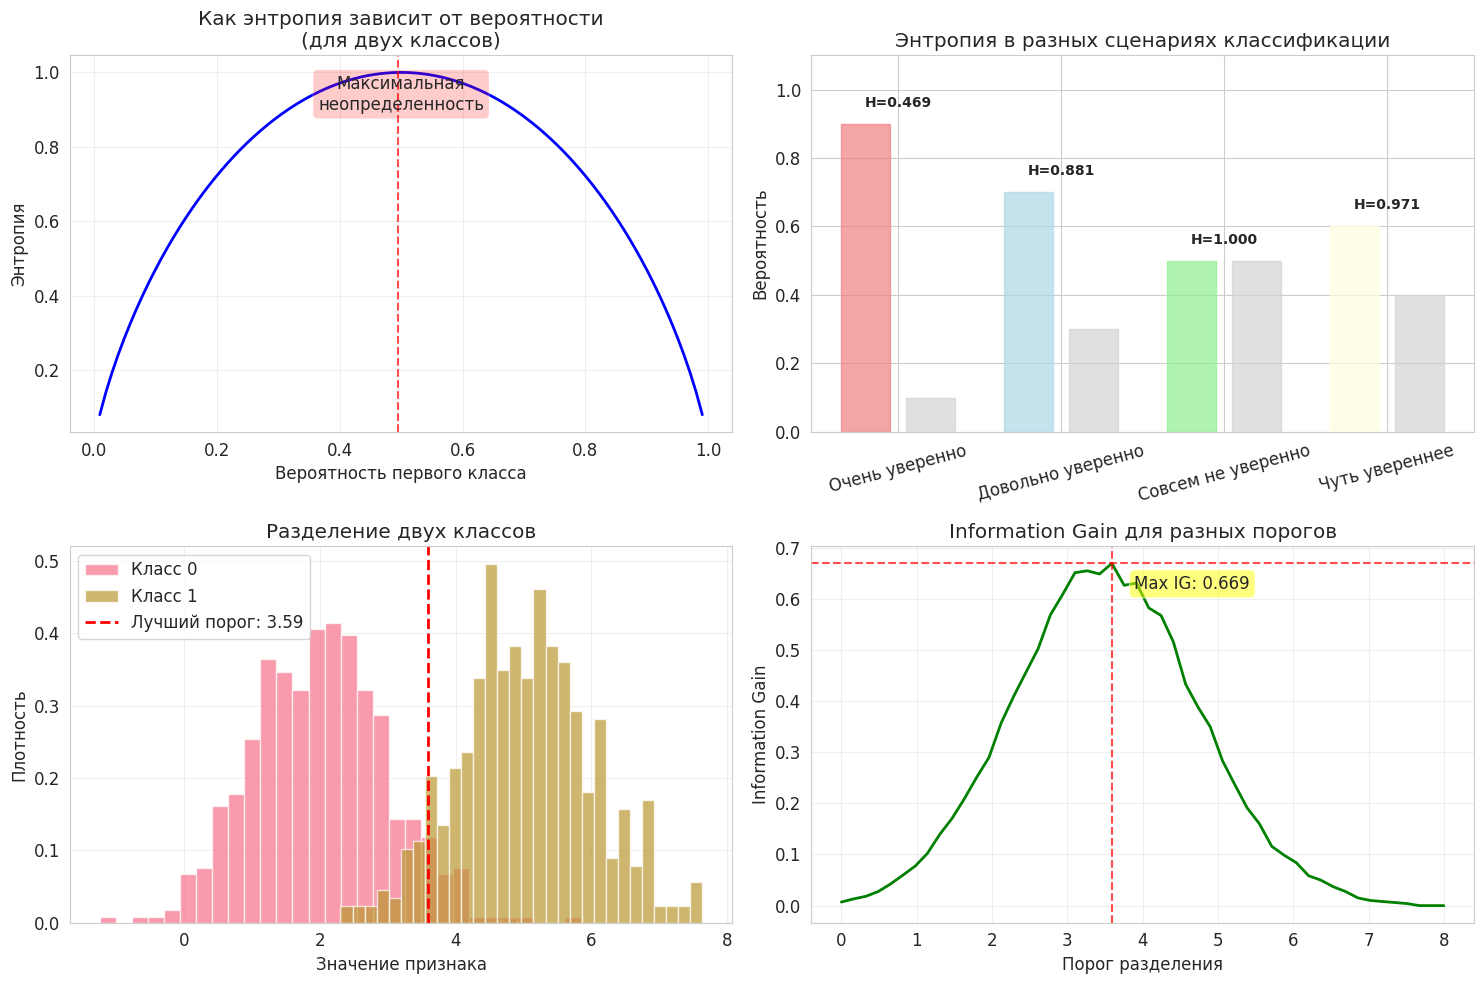

КАК Я ПОНЯЛ ЭНТРОПИЮ В МАШИННОМ ОБУЧЕНИИ:
1. 📊 Энтропия показывает неопределенность
2. 🎯 В деревьях решений ищем признаки с большим Information Gain
3. 🔧 Кросс-энтропия - это функция потерь в классификации
4. 📈 Когда модель уверена - энтропия низкая
5. ❓ Когда модель не уверена - энтропия высокая

💡 Выводы:
- Энтропия помогает измерять неопределенность
- Information Gain помогает выбирать хорошие признаки
- Кросс-энтропия наказывает за неправильные предсказания
- Все это важно для работы алгоритмов ML

✅ Графики сохранены!

🧪 Проверка расчетов:
Энтропия [0.5, 0.5]: 1.000
Энтропия [0.9, 0.1]: 0.469
Лучший порог в примере: 3.59
Максимальный IG: 0.669


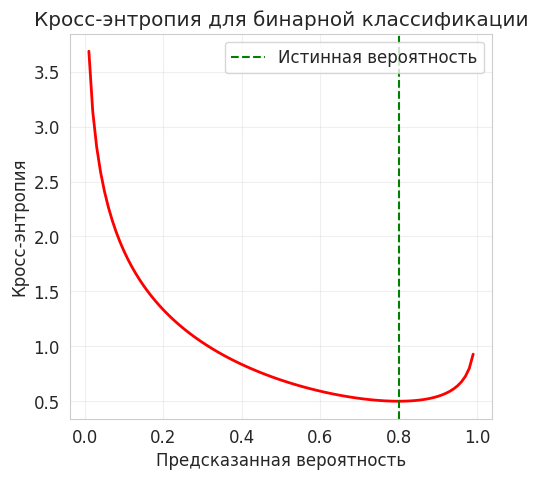

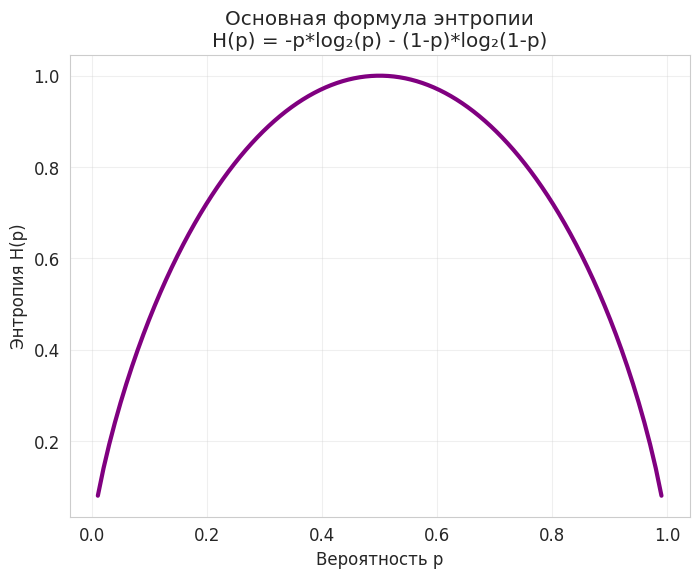

In [ ]:
# -*- coding: utf-8 -*-
"""Разбираюсь с энтропией в машинном обучении"""

# Импорты какие-то нужные, не все понятно зачем
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
import seaborn as sns

# Настройка графиков чтобы красиво было
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

# ==================== ЧАСТЬ 1: ПРОБУЮ РАЗОБРАТЬСЯ С ФОРМУЛОЙ ЭНТРОПИИ ====================

# Вроде бы энтропия считается так: H = -sum(p * log(p))
# Попробую сделать функцию для расчета

def calculate_entropy(probabilities):
    """Пытаюсь посчитать энтропию по формуле"""
    # Отфильтровываем нулевые вероятности чтобы не было ошибок
    probs = [p for p in probabilities if p > 0]
    # Считаем по формуле из лекции
    entropy_val = 0
    for p in probs:
        entropy_val += p * np.log2(p)
    return -entropy_val

# Проверяю на простом примере
test_probs = [0.5, 0.5]
entropy_test = calculate_entropy(test_probs)
print(f"Энтропия для [0.5, 0.5]: {entropy_test:.3f}")

# Делаю график для двух классов
p_values = np.linspace(0.01, 0.99, 100)
entropy_values = []

for p in p_values:
    # Для каждого p считаю энтропию
    current_entropy = calculate_entropy([p, 1-p])
    entropy_values.append(current_entropy)

# Рисую первый график
plt.subplot(2, 2, 1)
plt.plot(p_values, entropy_values, 'b-', linewidth=2)
plt.xlabel('Вероятность первого класса')
plt.ylabel('Энтропия')
plt.title('Как энтропия зависит от вероятности\n(для двух классов)')
plt.grid(True, alpha=0.3)

# Показываю где максимальная неопределенность
max_entropy_idx = np.argmax(entropy_values)
plt.axvline(x=p_values[max_entropy_idx], color='red', linestyle='--', alpha=0.7)
plt.text(0.5, 0.9, 'Максимальная\nнеопределенность', ha='center',
         bbox=dict(boxstyle="round", facecolor="red", alpha=0.2))

# ==================== ЧАСТЬ 2: СМОТРЮ КАК ЭНТРОПИЯ ВЕДЕТ СЕБЯ В РАЗНЫХ СЛУЧАЯХ ====================

# Беру разные сценарии из того что было на лекции
scenarios = {
    'Очень уверенно': [0.9, 0.1],
    'Довольно уверенно': [0.7, 0.3],
    'Совсем не уверенно': [0.5, 0.5],
    'Чуть увереннее': [0.6, 0.4]
}

# Считаю энтропию для каждого случая
entropy_results = {}
for name, probs in scenarios.items():
    entropy_results[name] = calculate_entropy(probs)

# Визуализирую
plt.subplot(2, 2, 2)
colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightyellow']

for i, ((name, probs), color) in enumerate(zip(scenarios.items(), colors)):
    # Рисую столбцы для вероятностей
    bars = plt.bar([i-0.2, i+0.2], probs, width=0.3, alpha=0.7)
    bars[0].set_color(color)
    bars[1].set_color('lightgray')

    # Подписываю значение энтропии
    plt.text(i, max(probs) + 0.05, f'H={entropy_results[name]:.3f}',
             ha='center', fontsize=10, fontweight='bold')

plt.xticks(range(len(scenarios)), scenarios.keys(), rotation=15)
plt.ylabel('Вероятность')
plt.title('Энтропия в разных сценариях классификации')
plt.ylim(0, 1.1)

# ==================== ЧАСТЬ 3: ПРОБУЮ ПОНЯТЬ INFORMATION GAIN ====================

# Делаю простой пример с двумя нормальными распределениями
np.random.seed(42)  # Чтобы результаты повторялись

# Генерирую данные для двух классов
class_0 = np.random.normal(2, 1, 500)  # Первый класс
class_1 = np.random.normal(5, 1, 500)  # Второй класс

# Объединяю все данные
all_data = np.concatenate([class_0, class_1])
all_labels = np.concatenate([np.zeros(500), np.ones(500)])

# Пробую разные пороги разделения
thresholds = np.linspace(0, 8, 50)
information_gains = []

# Энтропия до разделения (все данные)
total_entropy = calculate_entropy([0.5, 0.5])

for threshold in thresholds:
    # Разделяю данные по порогу
    left_side = all_data < threshold
    right_side = all_data >= threshold

    # Считаю сколько элементов каждого класса в каждой части
    left_class_0 = np.sum(all_labels[left_side] == 0)
    left_class_1 = np.sum(all_labels[left_side] == 1)
    right_class_0 = np.sum(all_labels[right_side] == 0)
    right_class_1 = np.sum(all_labels[right_side] == 1)

    # Считаю вероятности для левой части
    if left_class_0 + left_class_1 > 0:
        left_probs = [left_class_0/(left_class_0+left_class_1),
                     left_class_1/(left_class_0+left_class_1)]
        left_entropy = calculate_entropy(left_probs)
    else:
        left_entropy = 0

    # Считаю вероятности для правой части
    if right_class_0 + right_class_1 > 0:
        right_probs = [right_class_0/(right_class_0+right_class_1),
                      right_class_1/(right_class_0+right_class_1)]
        right_entropy = calculate_entropy(right_probs)
    else:
        right_entropy = 0

    # Веса для каждой части
    left_weight = np.sum(left_side) / len(all_data)
    right_weight = np.sum(right_side) / len(all_data)

    # Information Gain
    ig = total_entropy - (left_weight * left_entropy + right_weight * right_entropy)
    information_gains.append(ig)

# Ищу лучший порог
best_threshold = thresholds[np.argmax(information_gains)]
best_ig = max(information_gains)

# Рисую распределения
plt.subplot(2, 2, 3)
plt.hist(class_0, bins=30, alpha=0.7, label='Класс 0', density=True)
plt.hist(class_1, bins=30, alpha=0.7, label='Класс 1', density=True)
plt.axvline(best_threshold, color='red', linestyle='--', linewidth=2,
           label=f'Лучший порог: {best_threshold:.2f}')
plt.xlabel('Значение признака')
plt.ylabel('Плотность')
plt.title('Разделение двух классов')
plt.legend()
plt.grid(True, alpha=0.3)

# Рисую Information Gain
plt.subplot(2, 2, 4)
plt.plot(thresholds, information_gains, 'g-', linewidth=2)
plt.axvline(best_threshold, color='red', linestyle='--', alpha=0.7)
plt.axhline(best_ig, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Порог разделения')
plt.ylabel('Information Gain')
plt.title('Information Gain для разных порогов')
plt.grid(True, alpha=0.3)

# Подписываю максимальное значение
plt.text(best_threshold + 0.3, best_ig - 0.05,
        f'Max IG: {best_ig:.3f}',
        bbox=dict(boxstyle="round", facecolor="yellow", alpha=0.5))

plt.tight_layout()
plt.show()

# ==================== ЧАСТЬ 4: ПРОБУЮ РАЗОБРАТЬСЯ С КРОСС-ЭНТРОПИЕЙ ====================

# Делаю отдельный график для кросс-энтропии
plt.figure(figsize=(12, 5))

# Истинное распределение (как будто мы знаем правильный ответ)
true_probs = [0.8, 0.2]

# Пробую разные предсказания
predicted_probs = np.linspace(0.01, 0.99, 100)
cross_entropy_values = []

for q in predicted_probs:
    # Кросс-энтропия: H(p,q) = -p*log(q) - (1-p)*log(1-q)
    ce = -true_probs[0]*np.log(q) - true_probs[1]*np.log(1-q)
    cross_entropy_values.append(ce)

plt.subplot(1, 2, 1)
plt.plot(predicted_probs, cross_entropy_values, 'r-', linewidth=2)
plt.axvline(x=true_probs[0], color='green', linestyle='--',
           label='Истинная вероятность')
plt.xlabel('Предсказанная вероятность')
plt.ylabel('Кросс-энтропия')
plt.title('Кросс-энтропия для бинарной классификации')
plt.legend()
plt.grid(True, alpha=0.3)

# ==================== ЧАСТЬ 5: ПРАКТИЧЕСКОЕ ПРИМЕНЕНИЕ ====================

print("="*60)
print("КАК Я ПОНЯЛ ЭНТРОПИЮ В МАШИННОМ ОБУЧЕНИИ:")
print("="*60)
print("1. 📊 Энтропия показывает неопределенность")
print("2. 🎯 В деревьях решений ищем признаки с большим Information Gain")
print("3. 🔧 Кросс-энтропия - это функция потерь в классификации")
print("4. 📈 Когда модель уверена - энтропия низкая")
print("5. ❓ Когда модель не уверена - энтропия высокая")

print("\n💡 Выводы:")
print("- Энтропия помогает измерять неопределенность")
print("- Information Gain помогает выбирать хорошие признаки")
print("- Кросс-энтропия наказывает за неправильные предсказания")
print("- Все это важно для работы алгоритмов ML")

# Сохраняю графики
try:
    plt.savefig('entropy_analysis.png', dpi=300, bbox_inches='tight')
    print("\n✅ Графики сохранены!")
except:
    print("\n⚠️ Не удалось сохранить графики")

# Простая проверка что все работает
print(f"\n🧪 Проверка расчетов:")
print(f"Энтропия [0.5, 0.5]: {calculate_entropy([0.5, 0.5]):.3f}")
print(f"Энтропия [0.9, 0.1]: {calculate_entropy([0.9, 0.1]):.3f}")
print(f"Лучший порог в примере: {best_threshold:.2f}")
print(f"Максимальный IG: {best_ig:.3f}")

# Дополнительная визуализация
plt.figure(figsize=(8, 6))
x = np.linspace(0.01, 0.99, 100)
y = -x * np.log2(x) - (1-x) * np.log2(1-x)
plt.plot(x, y, 'purple', linewidth=3)
plt.xlabel('Вероятность p')
plt.ylabel('Энтропия H(p)')
plt.title('Основная формула энтропии\nH(p) = -p*log₂(p) - (1-p)*log₂(1-p)')
plt.grid(True, alpha=0.3)
plt.show()